### Aufgabe

Diese Aufgabe beschäftigt sich mit den einfachsten Verfahren um Anfangswertprobleme gewöhnlicher Differentialgleichungen zu lösen. 

Wir betrachten die einfachste lineare Differentialgleichung die es gibt: 
\begin{equation}
  \frac{d y}{dt} = \lambda y \, , \quad y(0) = 1 \, , \quad \lambda \in \mathbb{R} \, .
\end{equation}

Diese DGL hat die Form
\begin{equation}
  \frac{d y}{dt} = f(t,y) \, , \quad y(0) = 1 \, , \quad f: \mathbb{R}^2 \to \mathbb{R}\, .
\end{equation}

Die analytische Lösung lautet $y(t) = \exp(\lambda t)$, hiergegen können wir unsere numerischen Methoden testen. Wenn unsere Methoden hier kein zufriedenstellendes Ergebnis liefern (für beliebige $\lambda$), so brauchen wir keine Hoffnung haben, dass wir später analytisch nicht lösbare Gleichungen korrekt mit diesen Verfahren lösen können.

#### Verfahren 1 : Das Euler-Forward Verfahren

Für das Euler-Forward Verfahren diskretisieren wir die DGL wie folgt:
\begin{equation}
  \frac{d y}{d t}  \to \frac{y(t + \Delta t) - y(t) }{\Delta t} \quad \text{und} \quad f(t,y) \to f(t, y(t)) \, ,
\end{equation}
sodass wir 
\begin{equation}
  \frac{y(t + \Delta t) - y(t) }{\Delta t} = \lambda y(t) \, ,
\end{equation}
und schließlich
\begin{equation}
 y(t + \Delta t) = y(t) + \Delta t \lambda y(t) \, ,
\end{equation}
erhalten.

#### Verfahren 2 : Das Euler-Backward Verfahren

Für das Euler-Backward Verfahren diskretisieren wir die DGL wie folgt:
\begin{equation}
  \frac{d y}{d t}  \to \frac{y(t + \Delta t) - y(t) }{\Delta t} \quad \text{und} \quad f(t,y) \to f(t, y(t+\Delta t)) \, ,
\end{equation}
sodass wir 
\begin{equation}
  \frac{y(t + \Delta t) - y(t) }{\Delta t} = \lambda y(t + \Delta t) \, ,
\end{equation}
und schließlich
\begin{equation}
 y(t + \Delta t) = \frac{y(t)}{1  - \Delta t \lambda} \, ,
\end{equation}
erhalten.

#### Verfahren 3 : Die Trapez-Methode

Die Trapezmethode ist eine Mischung aus Forward- und Backward-Euler Verfahren
\begin{equation}
  \frac{d y}{d t}  \to \frac{y(t + \Delta t) - y(t) }{\Delta t} \quad \text{und} \quad f(t,y) \to \frac{1}{2}\bigl( f(t,y(t)) + f(t, y(t+\Delta t))\bigr) \, ,
\end{equation}
sodass wir 
\begin{equation}
  \frac{y(t + \Delta t) - y(t) }{\Delta t} = \frac{1}{2}  \lambda  \left(y(t)  + y(t + \Delta t) \right) \, ,
\end{equation}
und schließlich
\begin{equation}
 y(t + \Delta t) = y(t) \frac{1 + \Delta t \lambda }{1  - \Delta t \lambda} \, ,
\end{equation}
erhalten.


---

* Alle drei Verfahren beruhen darauf aus einer aktuellen Lösung $y(t)$ eine spätere Lösung $y(t+\Delta t)$ zu bestimmen. Wir beginnen mit dem Startwert $y(0) = 1$
und gehen dann in $N$ Schritten der Größe $\Delta t$ bis zum Zeitpunkt $t=1$. Es bietet sich an, die Notation $y_i = y(i \Delta t), i = 0, \dots, N-1$ zu
verwenden. Der Startwert entspricht damit dem Wert $y_0$. 

* Zunächst sollen Sie die Euler-Forward Methode implementieren. Anschließend die weiteren Verfahren hinzuzufügen ist einfach.

* Ihr Programm soll die Werte $y_1 , y_2, \dots, y_{N-1}$ berechenen und diese (zusammen mit dem Startwert $y_0$) in einem Numpy Array ablegen. Verwenden Sie
zunächst $N=20$ Punkte und $\lambda = -1$ (aufpassen, nicht als magic number einbauen, diese Parameter müssen später änderbar sein!).

* Nachdem Sie mit dem Euler-Forward Verfahren alle Werte berechnet haben, plotten Sie die Lösung als Funktion von $t$ und fügen Sie zum Plot die analytische Lösung hinzu.
  Für die gewählten Parameter müsste eine relativ gute Übereinstimmung sichtbar sein.

* Ändern Sie nun $\lambda$ schrittweise auf $\lambda = -10$ und schließlich $\lambda = -30$ bzw. $\lambda = -40$. Was beobachten Sie?

* Berechnen Sie nun zusätzlich im gleichen Programm die Lösungen nach der Euler-Backward und der Trapezmethode. Variieren Sie erneut $\lambda$. Was beobachten Sie für diese
 zwei Lösungen?


[1.         0.94736842 0.89750693 0.85026972 0.80551868 0.76312296
 0.72295859 0.68490814 0.64886035 0.6147098  0.58235665 0.5517063
 0.52266913 0.49516023 0.46909916 0.44440973 0.42101975 0.39886081
 0.37786814 0.35798034]


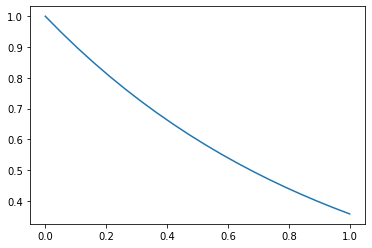

In [25]:
import numpy as np
import matplotlib.pyplot as plt
y0 = 1
t0 = 0
lam = -1
N = 20
yn = np.zeros(N)
t = np.linspace(0,1,20)
dt= t[1] - t[0]

def y(lam,dt): 
    ydt = y0 * (1+lam*dt)
    return ydt

for i in range(N):
    y1 = y(lam,dt)    
    yn[i] = y0
    y0 = y1


print(yn)
plt.plot(t,yn)
plt.show()


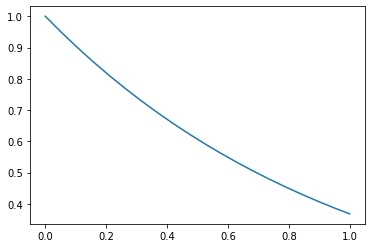

In [40]:
yt = np.zeros(N)

y0 = 1
def ytz(lam,dt): 
    ytz = y0*(1+lam*dt/2)/(1-lam*dt/2)
    return ytz

for i in range(N):
    y1 = ytz(lam,dt)
    yt[i] = y0
    y0 = y1

plt.plot(t,yt)
plt.show()


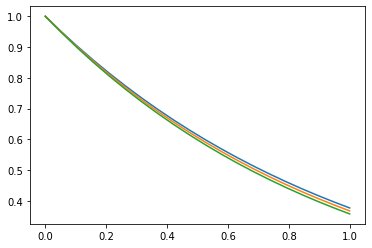

In [42]:
yr = np.zeros(N)

y0 = 1
def yb(lam,dt): 
    yb = y0/(1-lam*dt)
    return yb

for i in range(N):
    y1 = yb(lam,dt)
    yr[i] = y0
    y0 = y1

plt.plot(t,yr)
plt.plot(t,yt)
plt.plot(t,yn)
plt.show()
